# Annotation

Eng: In the previous file `hr_diagram.ipynb` we have interpreted the HR-diagram using numpy. In this file we are going to interpret it with seaborn only, also we are going to make a model which will be taught to classify the stars.

---

Ukr: У попередньому файлі `hr_diagram.ipynb` ми інтерпретували HR-діаграму за допомогою numpy. У цьому файлі ми інтерпретуватимемо її лише за допомогою seaborn, а також створимо модель, яку буде навчено класифікувати зорі.

# Required Packages

Eng: Since we will be working with data and machine learning process, we will need some packages. Such as: numpy, pandas, matplotlib, seaborn and scikit-learn.

*UPD: adding joblib library to the requirements as we are going to save our trained model.*

---

Ukr: Оскільки ми будемо працювати з даними та процесом машинного навчання, нам знадобляться деякі пакети. Такі як: numpy, pandas, matplotlib, seaborn та scikit-learn.

*UPD: додаємо бібліотеку joblib до вимог, оскільки ми збираємося зберегти нашу навчену модель.*

In [3]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn scikit-learn

## Installing joblib

In [4]:
!{sys.executable} -m pip install joblib

# Data Processing 

Eng: First of all we have to read the .csv file which contains data about stars. For this we are going to use pandas module.

---
    
Ukr: Перш за все, нам потрібно прочитати файл .csv, який містить дані про зорі. Для цього ми скористаємося модулем pandas.

## Importing modules

In [5]:
import pandas as pd

## Dataset

In [6]:
dataset = pd.read_csv(
    '../data/stars.csv' 
)

## Dataset information

In [7]:
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [8]:
'''
Dataset Heading, 5 first lines of data
'''
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [9]:
'''
Dataset Basic Column Information
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


# Data Visualization

Eng: Now we are going to output the HR-diagram. So for this we are going to use seaborn and matplotlib.

--- 

Ukr: Тепер ми виведемо HR-діаграму. Для цього ми використаємо seaborn та matplotlib.

## Importing modules

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## Visualization

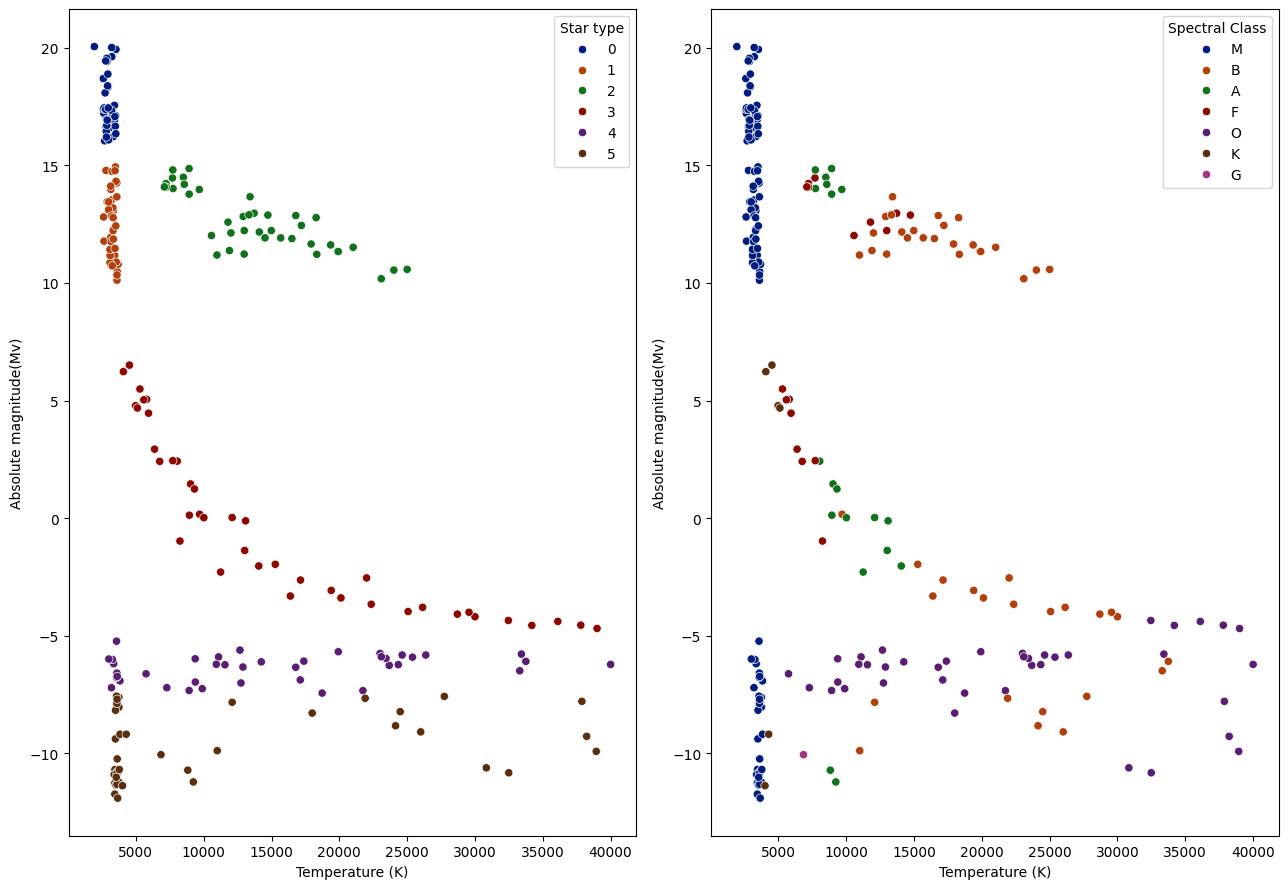

In [11]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(13, 9)
)

'''
Here we are going to use Absolute magnitude(Mv) for ploting the diagram. 
But on the left you will see the type, like: (Brown Dwarf, Red Dwarf, White Dwarf, Main Sequence, Supergiant, Hypergiant).
And on the right you will see the class ploting.

Тут ми будемо використовувати Абсолютну магнітуду (Mv) для побудови діаграми. 
Але зліва ви побачите тип, наприклад: 
(Коричневий карлик, Червоний карлик, Білий карлик, Головна послідовність, Надгігант, Гіпергігант).
А праворуч ви побачите побудову діаграми класу.
'''

'''
Star Type Encoding: 

Brown Dwarf -> Star Type = 0
Red Dwarf -> Star Type = 1
White Dwarf-> Star Type = 2
Main Sequence -> Star Type = 3
Supergiant -> Star Type = 4
Hypergiant -> Star Type = 5

Кодування типу зорі: 

Коричневий карлик -> Тип зорі = 0
Червоний карлик -> тип зірки = 1
Білий карлик -> Тип зорі = 2
Головна послідовність -> Тип зорі = 3
Надгігант -> Тип зорі = 4
Гіпергігант -> Тип зорі = 5
'''

sns.scatterplot(
    x='Temperature (K)',
    y='Absolute magnitude(Mv)',
    data=dataset,
    hue='Star type',
    ax=ax[0],
    palette='dark'
)

sns.scatterplot(
    x='Temperature (K)',
    y='Absolute magnitude(Mv)',
    data=dataset,
    hue='Spectral Class',
    ax=ax[1],
    palette='dark'
)

plt.tight_layout()
plt.show()

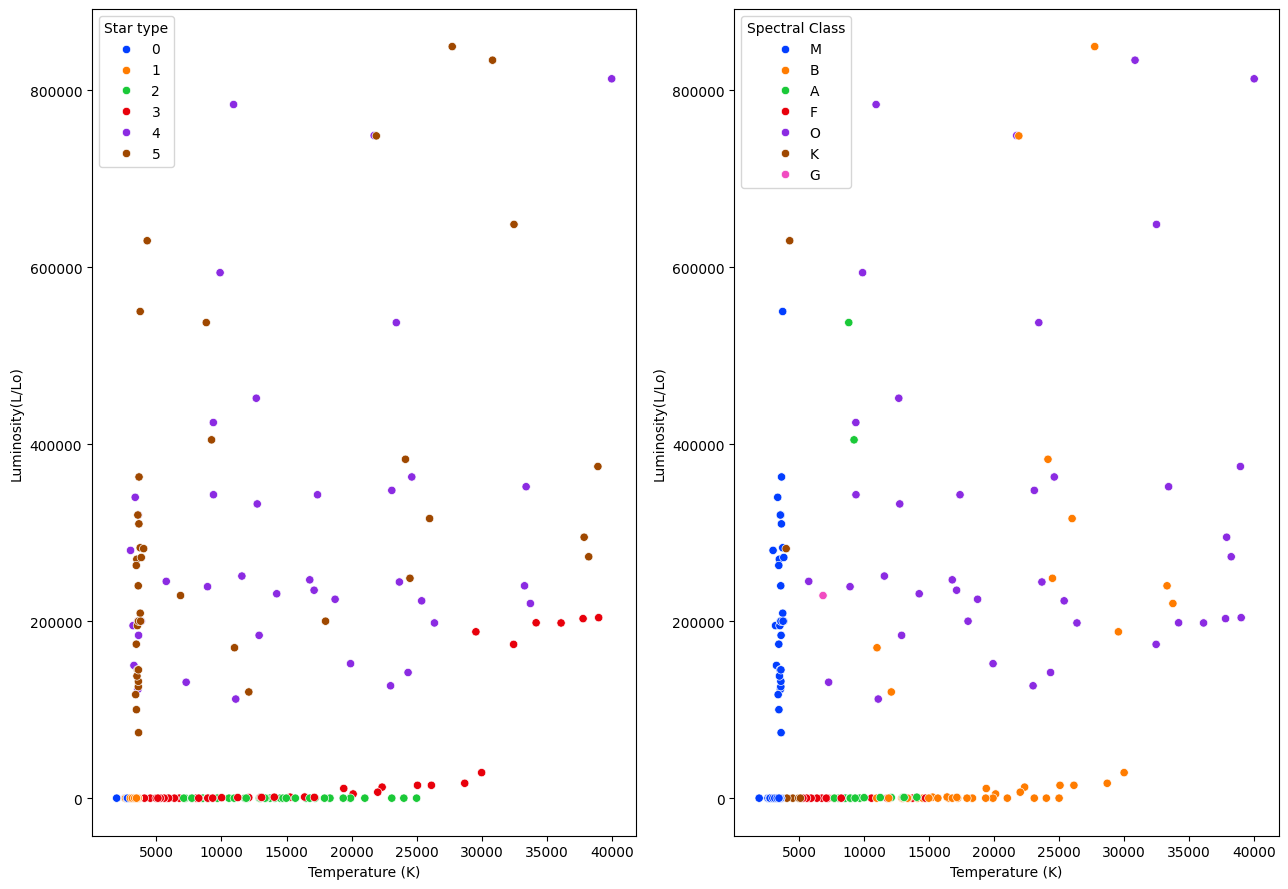

In [12]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(13, 9)
)

'''
Here we are going to Luminosity(L/Lo) for ploting the diagram. 
But on the left you will see the type, like: (Brown Dwarf, Red Dwarf, White Dwarf, Main Sequence, Supergiant, Hypergiant).
And on the right you will see the class ploting.

Тут ми переходимо до пункту Світність (L/Lo) для побудови діаграми. 
Але зліва ви побачите тип, наприклад: 
(Коричневий карлик, Червоний карлик, Білий карлик, Головна послідовність, Надгігант, Гіпергігант).
А праворуч ви побачите побудову діаграми класу.
'''

'''
Star Type Encoding: 

Brown Dwarf -> Star Type = 0
Red Dwarf -> Star Type = 1
White Dwarf-> Star Type = 2
Main Sequence -> Star Type = 3
Supergiant -> Star Type = 4
Hypergiant -> Star Type = 5

Кодування типу зорі: 

Коричневий карлик -> Тип зорі = 0
Червоний карлик -> тип зірки = 1
Білий карлик -> Тип зорі = 2
Головна послідовність -> Тип зорі = 3
Надгігант -> Тип зорі = 4
Гіпергігант -> Тип зорі = 5
'''

sns.scatterplot(
    x='Temperature (K)',
    y='Luminosity(L/Lo)',
    data=dataset,
    hue='Star type',
    ax=ax[0],
    palette='bright'
)

sns.scatterplot(
    x='Temperature (K)',
    y='Luminosity(L/Lo)',
    data=dataset,
    hue='Spectral Class',
    ax=ax[1],
    palette='bright'
)

plt.tight_layout()
plt.show()

Eng: The plots are different, because we are not using logarithm of the Temperature and Luminosity, in this case we would get the correct HR-diagram.

---

Ukr: Графіки відрізняються, тому що ми не використовуємо логарифм температури і яскравості, в цьому випадку ми б отримали HR-діаграму іншого вигляду.

# Preprocessing

Eng: Now, we are going to process our data and make a star learning our model. For this we will use numpy and scikit-learn.

---

Ukr: Тепер ми збираємося попередньо обробити дані та навчити нашу модель. Для цього ми будемо використовувати numpy та scikit-learn.

## Importing modules

In [13]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (KFold, GridSearchCV, 
    train_test_split, cross_val_score)

## Dataframe splitting

In [14]:
'''
Splitting dataframe into categorical and numeric features to perform preprocessing.
'''

dataframe_categorical = dataset.select_dtypes(
    exclude=np.number
)

dataframe_numeric = dataset.select_dtypes(
    include=np.number
)

In [15]:
dataframe_categorical.head(1)

,Star color,Spectral Class
0,Red,M


In [16]:
dataframe_numeric.head(1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.0024,0.17,16.12,0


## Visualizing outliers

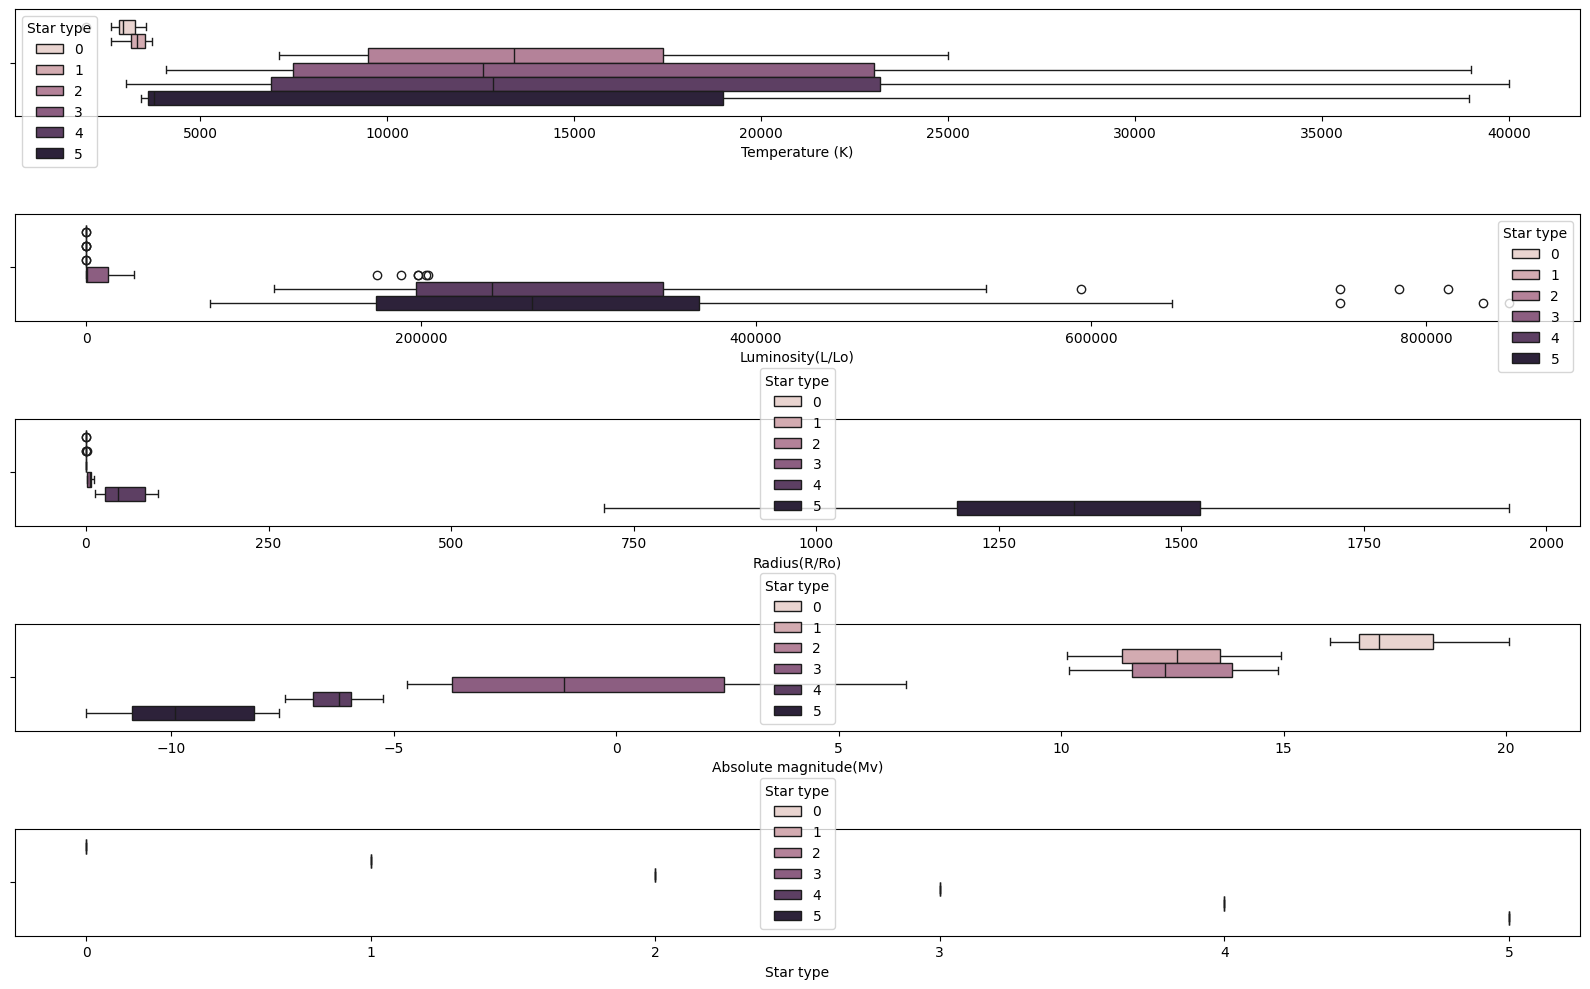

In [17]:
fig, ax = plt.subplots(
    len(dataframe_numeric.columns),
    figsize=(16, 10)
)

for i in range(len(dataframe_numeric.columns)):
    sns.boxplot(
        x=dataframe_numeric.iloc[:,i],
        ax=ax[i],
        hue=dataframe_numeric['Star type']
    )
    plt.tight_layout()

plt.show()

In [18]:
'''
Checking for class imbalance
'''

dataset['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [19]:
'''
Numeric features description
'''

dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Dataframe Scaling

In [20]:
_scaler = StandardScaler()

In [21]:
scaled_numeric = pd.DataFrame(
    _scaler.fit_transform(dataframe_numeric),
    columns=dataframe_numeric.columns
)

In [22]:
scaled_numeric.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


## Encoding Categorical Variables

In [23]:
encoded_categorical = pd.get_dummies(
    dataframe_categorical, drop_first=True
)

encoded_categorical.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


## Combining scaled numeric variables and encoded categorical variables

In [24]:
dataframe_mod = pd.concat(
    [encoded_categorical, scaled_numeric],
    axis=1
)

dataframe_mod.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


## Modeling

In [25]:
X = dataframe_mod.drop(
    'Star type', axis=1
)

Y = dataset['Star type']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    shuffle=True,
    random_state=6
)

## KNN Classifier

In [27]:
kn3 = KNeighborsClassifier(
    n_neighbors=3
)

kn3_model = kn3.fit(
    X_train, Y_train
)

## Scoring the model

In [28]:
train_score = kn3_model.score(
    X_train, Y_train
)

test_score = kn3_model.score(
    X_test, Y_test
)

print(
    'Training Score: {:.2f}%\n'.format(train_score * 100) + 
    '-' * 22 + '\n' +
    'Test Score: {:.2f}%\n'.format(test_score * 100)
)

Training Score: 98.44%
----------------------
Test Score: 97.92%



Eng: Well, as we see, the results are close to each other, so the model will well with unseen data.

---

Ukr: Що ж, як бачимо, результати близькі один до одного, тож модель буде добре працювати з "невидимими" даними.

## Classification Metrics

In [29]:
train_prediction = kn3_model.predict(
    X_train
)

print(
    classification_report(Y_train, train_prediction)
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        30
           3       0.91      1.00      0.96        32
           4       1.00      0.94      0.97        36
           5       1.00      0.97      0.98        33

    accuracy                           0.98       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.98      0.98       192



## Cross Validation

In [30]:
kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=48
)

scores = cross_val_score(
    kn3,
    X_train, 
    Y_train,
    cv=kfold,
    scoring='f1_weighted'
)

scores

array([0.97616893, 0.94871795, 1.        , 1.        , 0.97451963])

In [31]:
print(
    'Bias error: {}\n'.format((1 - np.mean(scores))) +
    '-' * 36 + '\n'
    'Variance error: {}\n'.format(
        (np.std(scores) / np.mean(scores))
    )
)

Bias error: 0.02011869795151533
------------------------------------
Variance error: 0.019487656442323933



Eng: There is no overfitting or underfitting in the model, as bias & variance error is very low.

---

Ukr: У моделі немає ні надмірної, ні недостатньої пристосованості, оскільки похибка зміщення та дисперсії є дуже низькою.

## GridSearchCV

Eng: Let's find the best value of n_neighbors using GridSearchCV.

---

Ukr: Знайдемо найкраще значення n_neighbors за допомогою GridSearchCV.

In [32]:
params = {
    'n_neighbors': range(2, 8)
}

In [33]:
knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid=params,
    cv=5,
    scoring='f1_weighted'
)

In [34]:
grid_model = grid.fit(
    X_train, Y_train
)

In [35]:
print(
    'Best Score: {:.2f}%\n'.format(grid_model.best_score_ * 100) +
    '-' * 19 + '\n' +
    f'Best n_neighbors: {grid_model.best_params_["n_neighbors"]}'
)

Best Score: 97.84%
-------------------
Best n_neighbors: 2


# Conclusion

Eng: The KNN model developed has 98% accuracy in classifying a star. The Best Score of GridSearch shows less effective result then the kn3 does.

---

Ukr: Розроблена модель KNN має точність класифікації зірок становить в середньому 98%. Найкраща оцінка GridSearch показує менш ефективний результат, ніж kn3.

# (UPD) Saving ML Models

Eng: To save the model we are going to use `joblib` library. Well, let's move on.

---

Ukr: Для збереження моделі ми скористаємося бібліотекою `joblib`. Що ж, продовжимо.

## Importing module

In [36]:
import joblib

## Dumping Models

In [37]:
# Save kn3 model
joblib.dump(kn3_model, '../output/models/kn3_model.pkl')

['../output/models/kn3_model.pkl']

In [38]:
# Save GridSearchCV Best model
joblib.dump(grid_model, '../output/models/gridsearchcv_best_model.pkl')

['../output/models/gridsearchcv_best_model.pkl']